In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
from datetime import datetime
from functools import reduce

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')


In [89]:
# Load the data, and convert 'tenths of degrees' to degrees
df = pd.read_csv('Weather_Patterns.csv')
df['Data_Value'] /= 10

# Separating Date Column
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['Month-Day'] = df['Date'].apply(lambda x: x[-5:])

# Letting behind February the 29th and separating 2015
df = df[df['Month-Day'] != '02-29']
df_before_15 = df[~(df['Year'] == '2015')]
df_15 = df[df['Year'] == '2015']

# Finding Max and Min Temperatures separated
tmax_before = df_before_15.groupby('Month-Day').agg({'Data_Value': np.max})
tmax_before = tmax_before.rename(columns={'Data_Value':'tmax'})
tmin_before = df_before_15.groupby('Month-Day').agg({'Data_Value': np.min})
tmin_before = tmin_before.rename(columns={'Data_Value':'tmin'})

tmax_15 = df_15.groupby('Month-Day').agg({'Data_Value': np.max})
tmax_15 = tmax_15.rename(columns={'Data_Value':'tmax-15'})
tmin_15 = df_15.groupby('Month-Day').agg({'Data_Value': np.min})
tmin_15 = tmin_15.rename(columns={'Data_Value':'tmin-15'})

# Building some Data Frames
temperatures_max = pd.merge(tmax_before, tmax_15, how='inner', left_index=True, right_index=True)
temperatures_min = pd.merge(tmin_before, tmin_15, how='inner', left_index=True, right_index=True)

# Looking for points out of bounds
temperatures_max['Higher Temperatures in 2015'] = np.where((temperatures_max['tmax-15'] > temperatures_max['tmax']), temperatures_max['tmax-15'] , np.nan)

temperatures_min['Lower Temperatures in 2015'] = np.where((temperatures_min['tmin-15'] < temperatures_min['tmin']), temperatures_min['tmin-15'] , np.nan)

#Merging all Data Frames
data_frames = [tmin_before, tmax_before, temperatures_max['Higher Temperatures in 2015'], temperatures_min['Lower Temperatures in 2015']]
tem = reduce(lambda  left,right: pd.merge(left,right,left_index=True,  right_index=True, how='left'), data_frames)
tem


,tmin,tmax,Higher Temperatures in 2015,Lower Temperatures in 2015
Month-Day,,,,
01-01,-16.0,15.6,NaN,NaN
01-02,-26.7,13.9,NaN,NaN
01-03,-26.7,13.3,NaN,NaN
01-04,-26.1,10.6,NaN,NaN
01-05,-15.0,12.8,NaN,-15.5
...,...,...,...,...
12-27,-13.8,18.9,NaN,NaN
12-28,-16.6,19.4,NaN,NaN
12-29,-15.0,12.8,NaN,NaN


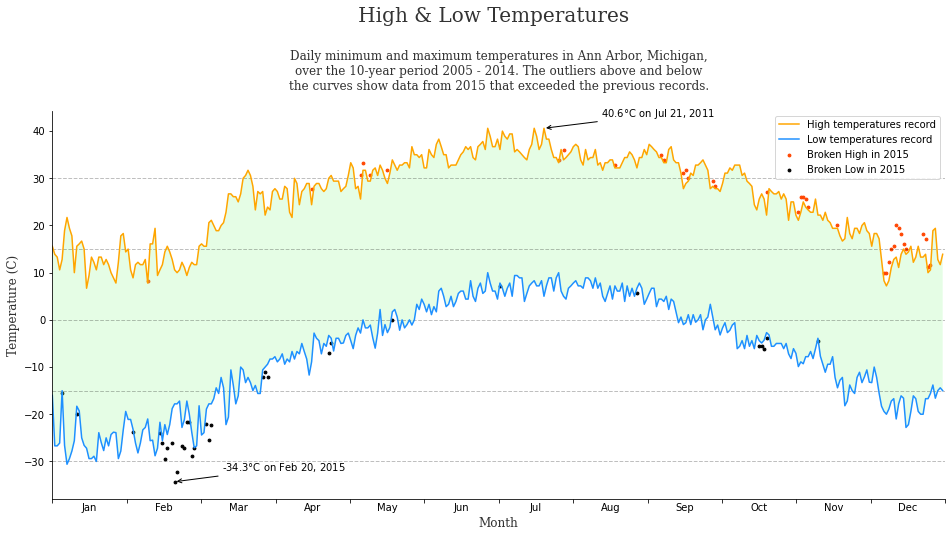

In [108]:
# Ploting 
plt.figure(figsize=(16,8))

plt.plot(tem['tmax'], c = 'orange', label ='High temperatures record')
plt.plot(tem['tmin'], c = 'dodgerblue', label ='Low temperatures record')

plt.scatter(tem.index.tolist(), tem['Higher Temperatures in 2015'], c = 'orangered', marker='o', s=8, label = "Broken High in 2015")
plt.scatter(tem.index.tolist(), tem['Lower Temperatures in 2015'], c = 'black', marker='o', s=8, label = "Broken Low in 2015")

#fill the area
plt.gca().fill_between(range(len(tem['tmin'])), tem['tmin'], tem['tmax'], facecolor='palegreen', alpha=0.25)

#Customizing
plt.xlabel('Month', fontsize=12, fontfamily = 'serif', alpha = 0.8)
plt.ylabel('Temperature (C)', fontsize=12, fontfamily = 'serif', alpha = 0.8)
plt.suptitle('   High & Low Temperatures\n', fontsize=20, fontfamily = 'serif', alpha = 0.8)
title_text = '''
Daily minimum and maximum temperatures in Ann Arbor, Michigan,
over the 10-year period 2005 - 2014. The outliers above and below
the curves show data from 2015 that exceeded the previous records.
'''
plt.subplots_adjust(top=0.8)
plt.title(title_text, fontsize=12, fontfamily = 'serif', alpha = 0.8)
#plt.xticks(range(0,365,10))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(fontsize=10, frameon = True)


# Plot some temperature lines for reference, and label them
plt.hlines([-30,-15,0,15,30], 0, 365, linestyles='dashed', linewidth=1,  colors='k', alpha=0.25)
#for x in range(-15,31,15):
#    ax.text(mpl.dates.date2num(dates[60+3*x]), x, '{:{}}$\degree$C'.format(x, '+' if x else ''), 
#            va='center', bbox={'facecolor':'white','alpha':0.5}, fontsize=10, fontweight='bold')


# X axis
plt.xlim(0,365)
x = np.arange(0, 365)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ticks = np.arange(min(x), max(x)+len(x)/12, len(x)/12)

minor_ticks = ticks + (len(x)/12)/2
minor_ticks = minor_ticks[:len(minor_ticks)-1]

ax = plt.gca()

ax.set_xticks(ticks)
ax.set_xticklabels('')
ax.set_xticks(minor_ticks, minor = True)
ax.set_xticklabels(labels, minor = True)
ax.tick_params(axis='x', which = 'minor', length= 0)

# Annotate the overall highest and lowest temperatures recorded, and the date on which this happened
max_val = df.sort_values('Data_Value', ascending = False)
max_val = max_val.iloc[[0,-1]]
max_val = max_val.loc[:,('Date','Data_Value')]

for i in max_val.index:
    max_data = max_val['Data_Value'][i]
    max_date = max_val['Date'][i]
    max_idate = tem.index.get_loc(max_date[-5:])  
    max_date = datetime.strptime(max_date, '%Y-%m-%d')
    max_loc = (max_idate, max_data)
    
    plt.annotate('{}$\degree$C on {}'.format(max_data, max_date.strftime('%b %d, %Y')), 
            xy=max_loc, xytext=(max_loc[0]+70,max_loc[1]+3),
            arrowprops={'arrowstyle':'->'}, va="center", ha="right", fontweight='normal')


# Saving image
plt.savefig('Climate.jpg', dpi = 300, bbox_inches='tight') 
